In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/titanic/train.csv
/kaggle/input/titanic/test.csv
/kaggle/input/titanic/gender_submission.csv


> # **Read Dataset**

In [2]:
train_data = pd.read_csv('/kaggle/input/titanic/train.csv')
train_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
train_data.shape

(891, 12)

In [4]:
test_data = pd.read_csv('/kaggle/input/titanic/test.csv')
test_data.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [5]:
test_data.shape

(418, 11)

In [6]:
Pass = test_data['PassengerId']
Pass.shape

(418,)

> # **Feature Engineering**

## Droping unusual columns for both train and test dataset

In [7]:
train_data = train_data.drop(columns = ['PassengerId', 'Name'])
test_data = test_data.drop(columns = ['PassengerId', 'Name'])

## Checking missing value for both train and test data

In [8]:
missing_train_values = [col for col in train_data.columns if train_data[col].isna().sum() > 0]
for col in missing_train_values:
    print(col, train_data[col].isna().sum(), train_data[col].dtypes)

Age 177 float64
Cabin 687 object
Embarked 2 object


In [9]:
missing_test_values = [col for col in test_data.columns if test_data[col].isna().sum() > 0]
for col in missing_test_values:
    print(col, test_data[col].isna().sum(), test_data[col].dtypes)

Age 86 float64
Fare 1 float64
Cabin 327 object


## Checking skewness of train data

/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Age', ylabel='Density'>

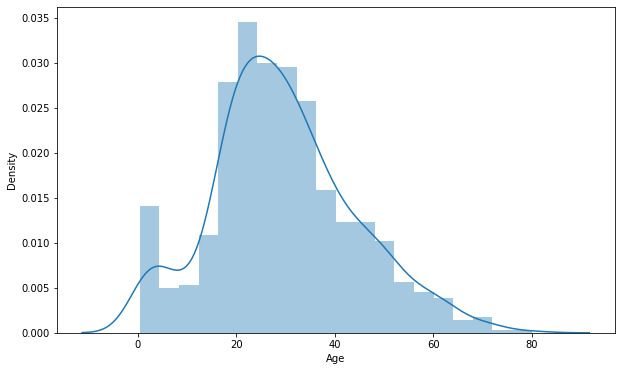

In [10]:
import seaborn as sns
import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize = (10, 6))
sns.distplot(train_data['Age'])

## Filling missing value by median in train and test dataset

In [11]:
from sklearn.impute import SimpleImputer
train_imputer = SimpleImputer(missing_values = np.nan, strategy = 'median')
train_imputer.fit(train_data[['Age']])
train_data[['Age']] = train_imputer.transform(train_data[['Age']])

In [12]:
test_imputer = SimpleImputer(missing_values = np.nan, strategy = 'median')
test_imputer.fit(test_data[['Age', 'Fare']])
test_data[['Age', 'Fare']] = test_imputer.transform(test_data[['Age', 'Fare']])

## Filling missing categorical value by most_frequent in train and test data

In [13]:
from sklearn.impute import SimpleImputer
object_train_data = [col for col in train_data.columns if (train_data[col].dtypes == 'object' and train_data[col].isna().sum() > 0)]
imputer_train_object = SimpleImputer(missing_values = np.nan, strategy = 'most_frequent')
imputer_train_object.fit(train_data[object_train_data])
train_data[object_train_data] = imputer_train_object.transform(train_data[object_train_data])

In [14]:
object_test_data = [col for col in test_data.columns if (test_data[col].dtypes == 'object' and test_data[col].isna().sum() > 0)]
imputer_test_mode = SimpleImputer(missing_values = np.nan, strategy = 'most_frequent')
imputer_test_mode.fit(test_data[object_test_data])
test_data[object_test_data] = imputer_test_mode.transform(test_data[object_test_data])

### Checking missing value

In [15]:
train_data.isna().sum().sum()

0

In [16]:
test_data.isna().sum().sum()

0

## Find no of unique categorical data of train data

In [17]:
for i in train_data.columns:
    if train_data[i].dtypes == 'object':
        print(f"{i} : {train_data[i].nunique()}")

Sex : 2
Ticket : 681
Cabin : 147
Embarked : 3


In [18]:
Label_train_data = [col for col in train_data.columns if (train_data[col].dtypes == 'object' and train_data[col].nunique() > 10)]
Label_train_data

['Ticket', 'Cabin']

In [19]:
OneHot_train_data = [col for col in train_data.columns if (train_data[col].dtypes == 'object' and train_data[col].nunique() <= 10)]
OneHot_train_data

['Sex', 'Embarked']

In [20]:
from sklearn.preprocessing import LabelEncoder
L = train_data[Label_train_data] = train_data[Label_train_data].apply(LabelEncoder().fit_transform)
L = np.array(L)

In [21]:
L.shape

(891, 2)

In [22]:
new_data = pd.get_dummies(train_data, columns=OneHot_train_data)

In [23]:
X = new_data.iloc[:, 1:].values
y = new_data.iloc[:, 0]

In [24]:
y = np.array(y)

In [25]:
X.shape

(891, 12)

In [26]:
main_train = np.concatenate((X, L), axis = 1)
main_train

array([[  3.,  22.,   1., ...,   1., 523.,  47.],
       [  1.,  38.,   1., ...,   0., 596.,  81.],
       [  3.,  26.,   0., ...,   1., 669.,  47.],
       ...,
       [  3.,  28.,   1., ...,   1., 675.,  47.],
       [  1.,  26.,   0., ...,   0.,   8.,  60.],
       [  3.,  32.,   0., ...,   0., 466.,  47.]])

In [27]:
main_train.shape

(891, 14)

In [28]:
type(main_train)

numpy.ndarray

In [29]:
type(y)

numpy.ndarray

## Find no of unique categorical data of test data

In [30]:
Label_test_data = [col for col in test_data.columns if (test_data[col].dtypes == 'object' and test_data[col].nunique() > 10)]
Label_test_data

['Ticket', 'Cabin']

In [31]:
OneHot_test_data = [col for col in test_data.columns if (test_data[col].dtypes == 'object' and test_data[col].nunique() <= 10)]
OneHot_test_data

['Sex', 'Embarked']

In [32]:
L1 = test_data[Label_test_data] = test_data[Label_test_data].apply(LabelEncoder().fit_transform)
L1 = np.array(L1)

In [33]:
L1.shape

(418, 2)

In [34]:
new_test_data = pd.get_dummies(test_data, columns=OneHot_test_data)

In [35]:
X1 = new_test_data.iloc[:, :].values

In [36]:
X1.shape

(418, 12)

In [37]:
main_test = np.concatenate((X1, L1), axis = 1)
main_test

array([[  3. ,  34.5,   0. , ...,   0. , 152. ,  15. ],
       [  3. ,  47. ,   1. , ...,   1. , 221. ,  15. ],
       [  2. ,  62. ,   0. , ...,   0. ,  73. ,  15. ],
       ...,
       [  3. ,  38.5,   0. , ...,   1. , 346. ,  15. ],
       [  3. ,  27. ,   0. , ...,   1. , 220. ,  15. ],
       [  3. ,  27. ,   1. , ...,   0. , 105. ,  15. ]])

In [38]:
main_test = np.concatenate((X1, L1), axis = 1)
main_test

array([[  3. ,  34.5,   0. , ...,   0. , 152. ,  15. ],
       [  3. ,  47. ,   1. , ...,   1. , 221. ,  15. ],
       [  2. ,  62. ,   0. , ...,   0. ,  73. ,  15. ],
       ...,
       [  3. ,  38.5,   0. , ...,   1. , 346. ,  15. ],
       [  3. ,  27. ,   0. , ...,   1. , 220. ,  15. ],
       [  3. ,  27. ,   1. , ...,   0. , 105. ,  15. ]])

In [39]:
main_test.shape

(418, 14)

# Train model on train data.

In [40]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
main_train = sc.fit_transform(main_train)
main_test = sc.transform(main_test)

In [41]:
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier(n_estimators=1000, criterion='entropy', random_state=0)
classifier.fit(main_train, y)

RandomForestClassifier(criterion='entropy', n_estimators=1000, random_state=0)

In [42]:
y_pred = classifier.predict(main_test)
y_pred.shape

(418,)

In [43]:
output = pd.DataFrame({'PassengerId' : Pass, 'Survived' : y_pred})
output.to_csv('submission.csv', index = False)